In [1]:
from qiskit import *
from qiskit.extensions import *

In [2]:
N = 3
qc = QuantumCircuit(N)

In [3]:
u_f = UnitaryGate([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, -1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])

In [4]:
diffuser = QuantumCircuit(N)
diffuser.h(list(range(N)))
diffuser.x(list(range(N)))
diffuser.h(N-1)
diffuser.mct(list(range(N-1)), N-1)
diffuser.h(N-1)
diffuser.x(list(range(N)))
diffuser.h(list(range(N)))
diffuser = diffuser.to_gate()

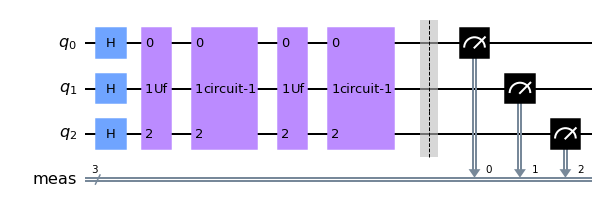

In [5]:
qc.h(list(range(N)))
qc.unitary(u_f, list(range(N)), 'Uf')
qc.append(diffuser, list(range(N)))
qc.unitary(u_f, list(range(N)), 'Uf')
qc.append(diffuser, list(range(N)))
qc.measure_all()
qc.draw(output='mpl')

In [7]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

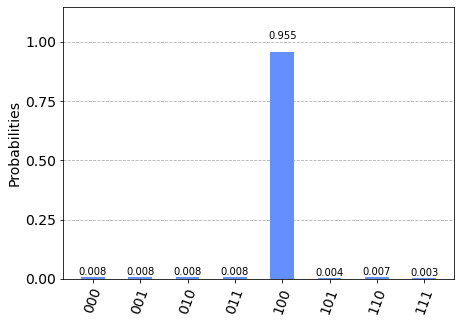

In [9]:
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)